<center>
    <h1 style="background: #222831; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Customer Personality Analysis
    </h1>
</center>

<center>
    <h2 style="background: #393E46; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Problem
    </h2>
</center>

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

<center>
    <h2 style="background: #393E46; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        About the dataset
    </h2>
</center>

### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

<center>
    <h2 style="background: #393E46; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Importing libraries and loading data
    </h2>
</center>

In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_personality = pd.read_csv('data/marketing_campaign.csv', sep="\t")
df_personality.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<center>
    <h2 style="background: #393E46; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        EDA and Feature Engineering
    </h2>
</center>

In [432]:
df_personality.shape

(2240, 29)

In [433]:
df_personality.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Missing and duplicates values
    </h3>
</center>

In [434]:
df_personality.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

No hice un gran análisis de los valores nulos, pero son muy pocos, por lo tanto voy a eliminarlos

In [435]:
df_personality.dropna(inplace=True)

In [436]:
df_personality.drop_duplicates(inplace=True)

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Encoding
    </h3>
</center>

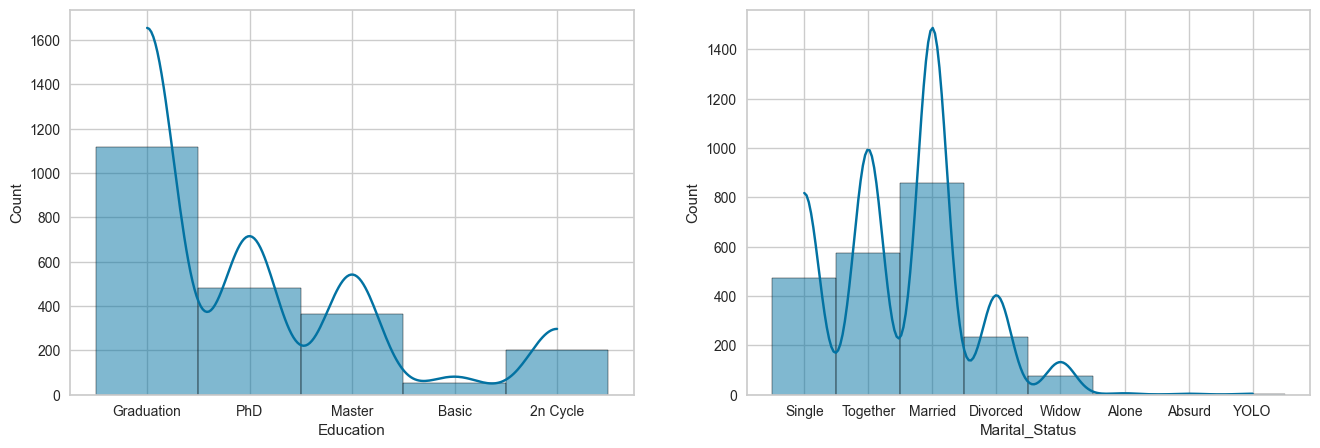

In [437]:
var_cat = df_personality.select_dtypes(include=['object','category']).columns
var_cat = var_cat.drop('Dt_Customer')
# Luego vemos porqué eliminé Dt_Customer

fig, ax = plt.subplots(1, len(var_cat), figsize=(16, 5))   
for i, cat in enumerate(var_cat):    
    sns.histplot(data=df_personality, x=cat, kde=True, ax=ax[i])

Consideraria apropiado usar Ordinal o Label Encoder en `Education`, o hacerlo en un orden específico, ya que veo un orden en los valores

In [438]:
df_personality['Education'] = df_personality['Education'].map(
    {'Basic':0,
    '2n Cycle':1,
    'Graduation':2,
    'Master':3,
    'PhD':4})

`Marital_Status` vamos a usarlo en binario, si está con pareja (Together, Married) y si está solo (Single,Divorced, Widow,Alone,Absurd,YOLO)

In [439]:
df_personality['Marital_Status'] = df_personality['Marital_Status'].apply(
    lambda x: 1 if x in ['Married','Together'] else 0
)

Verficamos como quedó la cosa

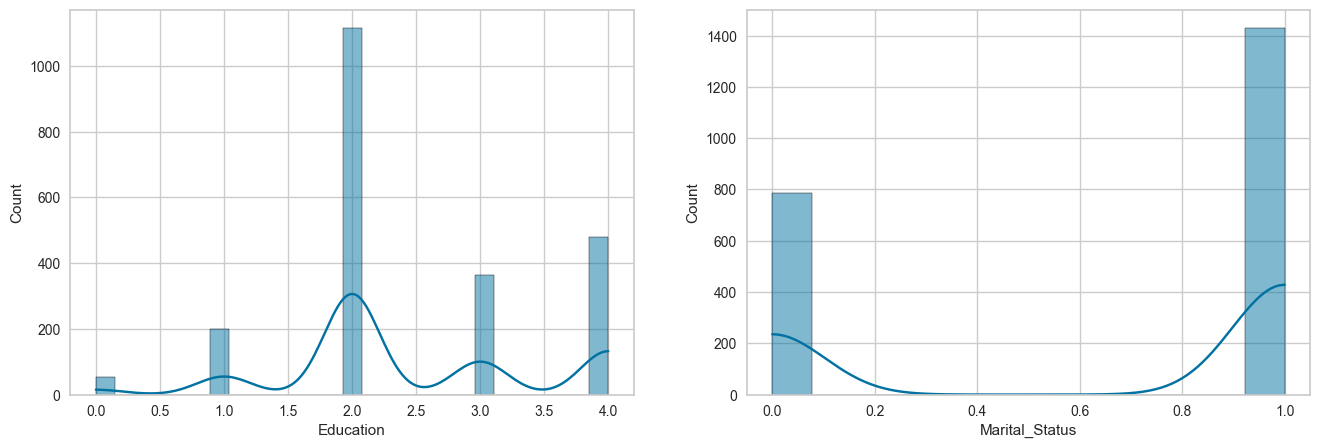

In [440]:
fig, ax = plt.subplots(1, len(var_cat), figsize=(16, 5))   
for i, cat in enumerate(var_cat):    
    sns.histplot(data=df_personality, x=cat, kde=True, ax=ax[i])

Ahora trabajo la variable `Dt_customer`, la idea es pasarla a formato fecha (día-mes-año)

In [441]:
df_personality['Dt_Customer'] = pd.to_datetime(df_personality['Dt_Customer'], format='%d-%m-%Y')

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Feature Engineering
</center>

Antes voy a eliminar variables que practicamente no tienen nada que ver, o no sé ni que son

In [442]:
df_personality.drop(columns=['ID','Z_CostContact','Z_Revenue'], axis=1, inplace=True)

En lugar de `Year_Birth` voy crear una variable `Age` ( Viendo la web del dataset, el dataset es del 2014, por lo que no usaré 2024 sino, 2014)

In [443]:
df_personality['Age'] = 2014-df_personality['Year_Birth']

In [444]:
# Voy a eliminarla, no creo que sea necesaria
df_personality.drop(['Year_Birth'], axis=1, inplace=True)

Acá uniré `Kidhome` con `Teenhome` en una variable llamada `Children` (Considero importante mantener las dos columnas iniciales, por lo que no las eliminaré)

In [445]:
df_personality['Children'] = df_personality['Kidhome']+df_personality['Teenhome']

Acá uniré todos Amount spent in last 2 years

In [446]:
df_personality['MntSpent'] = df_personality['MntWines']+df_personality['MntFruits']+df_personality['MntMeatProducts']+df_personality['MntSweetProducts']+df_personality['MntGoldProds']+df_personality['MntFishProducts']

Agregaré una variable para ver la antiguedad en la empresa, el dataset está en la fecha de Día 04, Mes 10, Año 2014, por lo que me voy a guiar por esa fecha, toca hacer en meses, porque hay personas que llevan meses y no años

In [447]:
last_date =  pd.to_datetime('04-10-2014', format='%d-%m-%Y')

df_personality['Seniority_months']  = df_personality['Dt_Customer'].apply(lambda x: (last_date - x).days / 30).round(2)

In [448]:
# Si considero importante eliminar ya el Dt_Customer
df_personality.drop(columns=['Dt_Customer'], axis=1, inplace=True)

Voy a agregar una variable, Family_size, para ver cuantas personas viven juntas

In [449]:
df_personality['Family_size'] = df_personality['Children'] + df_personality['Marital_Status'] + 1

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Outliers
</center>

Voy a revisar outliers para eliminarlos, en este caso solo `Age` y `Income` tenian outliers, igual con describe le damos una miradita por encima

In [450]:
df_personality.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,MntSpent,Seniority_months,Family_size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.459838,0.645307,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,0.150271,45.179603,0.947202,607.075361,15.017365,2.592509
std,1.004825,0.478528,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,602.900476,6.747720,0.905722
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,5.000000,3.230000,1.000000
25%,2.000000,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,69.000000,9.230000,2.000000
50%,2.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,1.000000,396.500000,15.085000,3.000000
75%,3.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,1048.000000,20.870000,3.000000
max,4.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,121.000000,3.000000,2525.000000,26.530000,5.000000


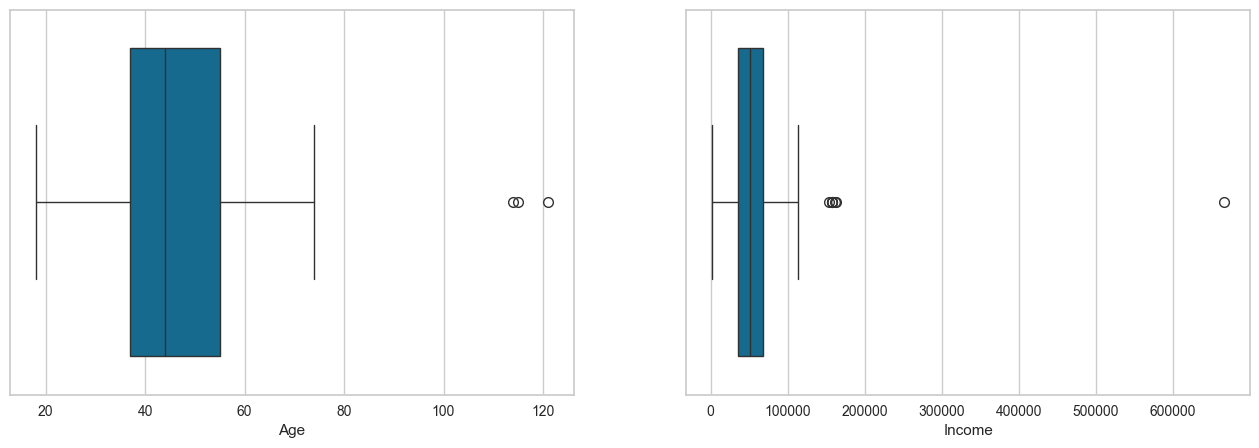

In [451]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.boxplot(x=df_personality['Age'], ax=ax[0])
sns.boxplot(x=df_personality['Income'], ax=ax[1])
plt.show()

In [452]:
df_personality = df_personality[df_personality['Age']<80]
# El valor de 666_666 obvio es muy fake, toca eliminarlo
df_personality = df_personality[df_personality['Income']<250_000]

Finalizando me gustaria ver como se ve la correlación de los datos

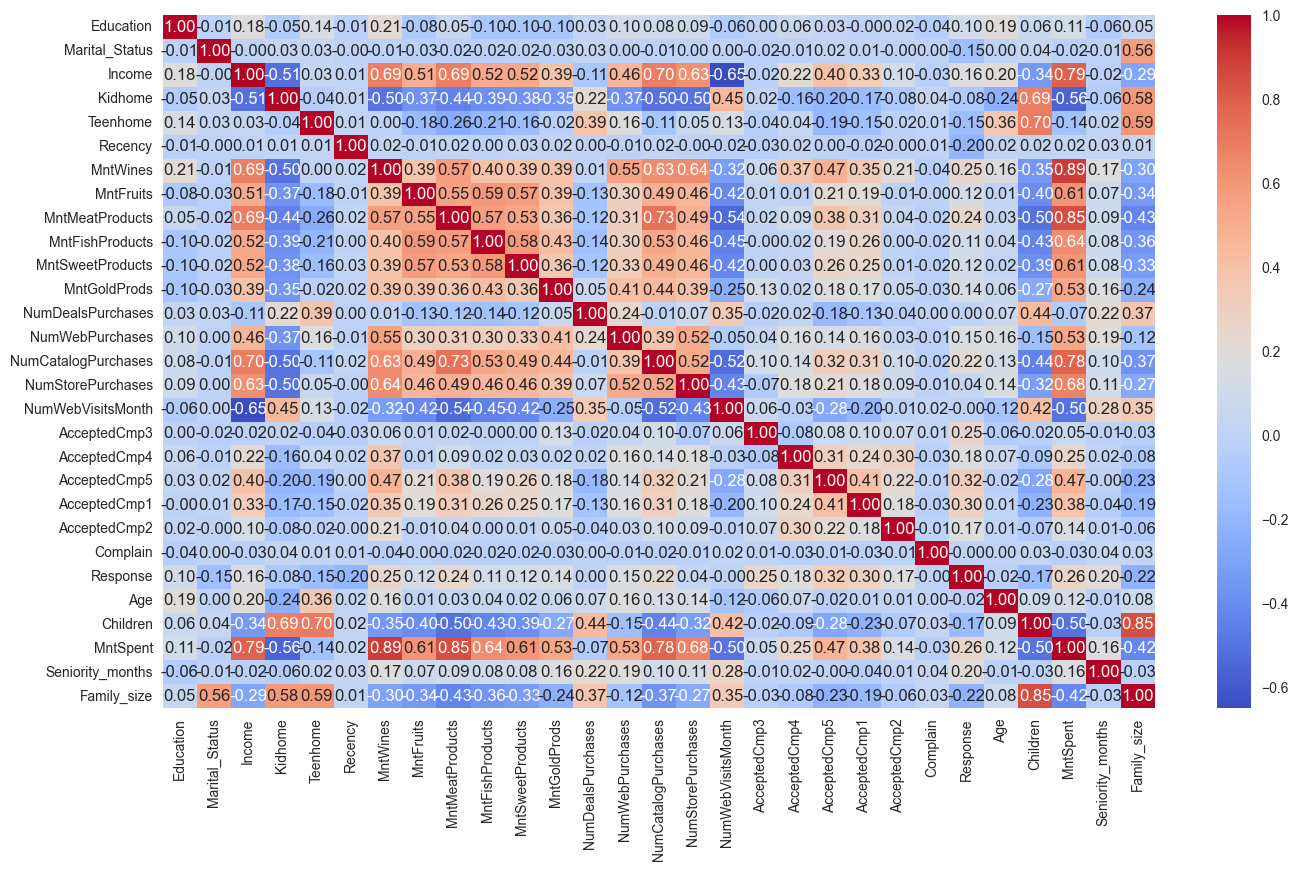

In [453]:
plt.figure(figsize=(16,9))
sns.heatmap(df_personality.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Featuring Scaling
</center>

Ahora llegó el momento de escalar los datos, primero voy a separar los datos que **No** necesitan ser escalados de los que **Sí**

In [454]:
bi_columns = []

for col in df_personality.columns:
    if set(df_personality[col].unique()) == {0,1}: bi_columns.append(col)

bi_columns

['Marital_Status',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [455]:
df_scaled = df_personality.copy()
df_scaled.drop(columns=bi_columns, inplace=True)

In [456]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(scaled, columns=df_scaled.columns)
df_scaled.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,MntSpent,Seniority_months,Family_size
0,-0.458850,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,-1.264598,1.676245,1.527251,-1.758359
1,-0.458850,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,1.404572,-0.963297,-1.189028,0.449070
2,-0.458850,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,-1.264598,0.280110,-0.206544,-0.654644
3,-0.458850,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,0.069987,-0.920135,-1.060105,0.449070
4,1.533251,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,0.069987,-0.307562,-0.951928,0.449070


<center>
    <h2 style="background: #393E46; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        PCA
    </h2>
</center>

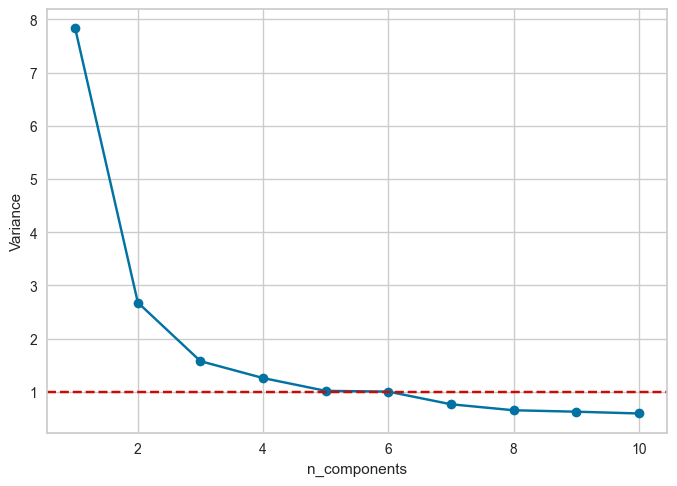

In [457]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_scaled = pca.fit_transform(df_scaled)
var = pca.explained_variance_

plt.plot(range(1, len(var) + 1), var, marker='o', linestyle='-')
plt.grid(True)
plt.ylabel('Variance')
plt.xlabel('n_components')
plt.axhline(y=1,color='r',linestyle='--')
plt.show()

Mediante el método del codo veo los componentes para usar con mi PCA (4)

In [458]:
pca_standard = pd.DataFrame(pca_scaled)
pca_standard.drop([4,5,6,7,8,9],axis=1,inplace=True)

<center>
    <h2 style="background: #393E46; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Clustering
    </h2>
</center>

In [459]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        K-Means PCA
</center>

Esta es una manera de hacerlo, pero no la voy a usar mucho porque es mucho código, pero queria dejarla presente

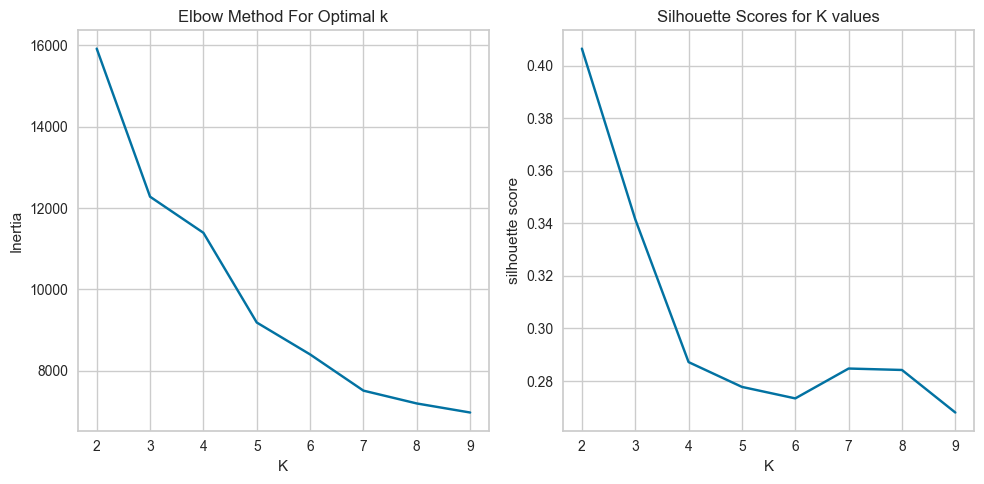

In [460]:
sum_of_squeared_distances = []
silhouette_scores = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(pca_standard)
    
    sum_of_squeared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_standard, y_pred))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sum_of_squeared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('K')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.title('Silhouette Scores for K values')
plt.xlabel('K')
plt.ylabel('silhouette score')

plt.tight_layout()
plt.show()

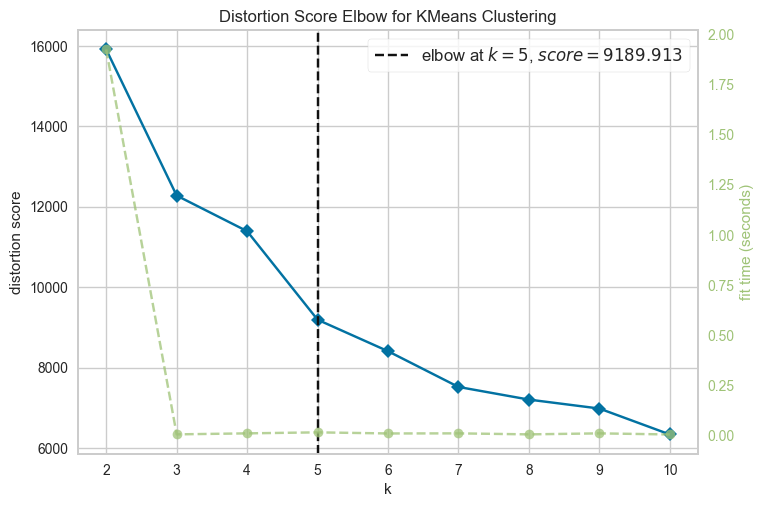

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [461]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(pca_standard)
Elbow_M.show()

In [462]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(pca_standard)

print(silhouette_score(pca_standard, y_pred))

df_personality['k_means_pca'] = y_pred

0.3415688010647852


<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        K-Means no PCA
</center>

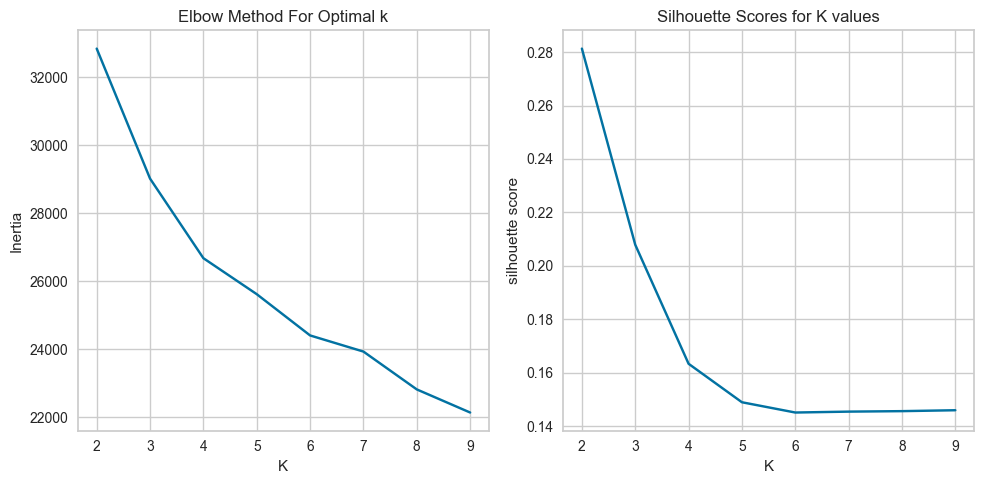

In [463]:
sum_of_squeared_distances = []
silhouette_scores = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(df_scaled)
    
    sum_of_squeared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, y_pred))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sum_of_squeared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('K')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.title('Silhouette Scores for K values')
plt.xlabel('K')
plt.ylabel('silhouette score')

plt.tight_layout()
plt.show()

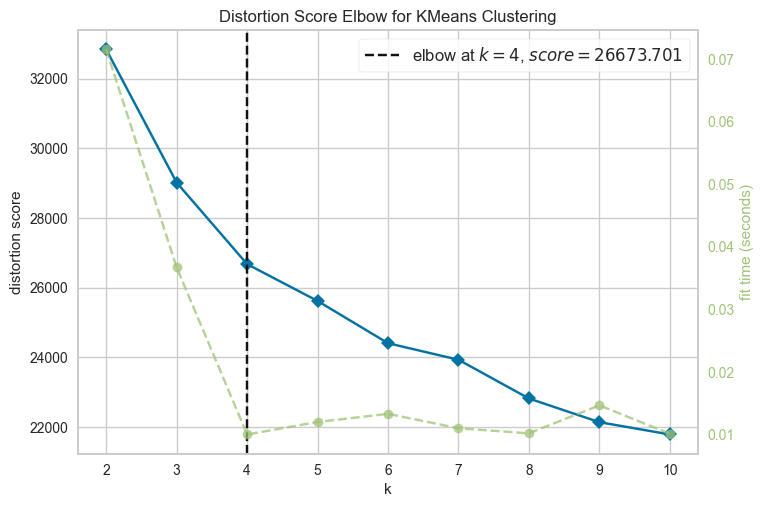

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [464]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(df_scaled)
Elbow_M.show()

In [465]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

print(silhouette_score(df_scaled, y_pred))

df_personality['k_means'] = y_pred

0.20791309086045065


<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Hierarchical Clustering PCA
</center>

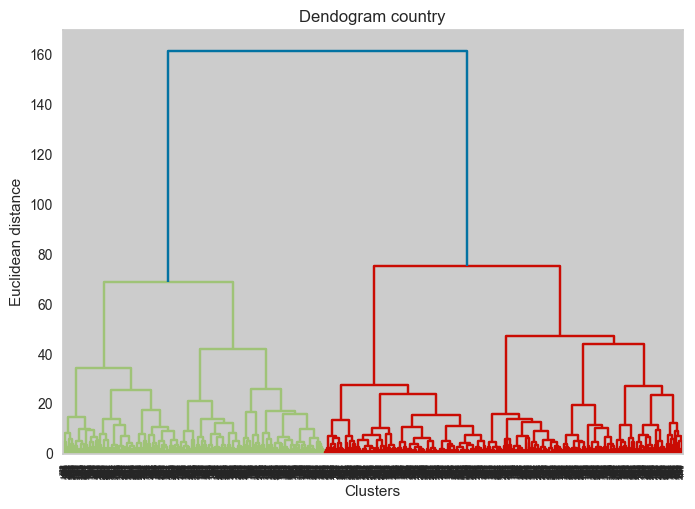

In [466]:
dendogram_plot = dendrogram(linkage(pca_standard, method='ward'))
plt.title('Dendogram country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [467]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(pca_standard)
print(silhouette_score(pca_standard, y_hc))
df_personality['hc_pca'] = y_hc

0.3862619722604358


<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Hierarchical Clustering
</center>

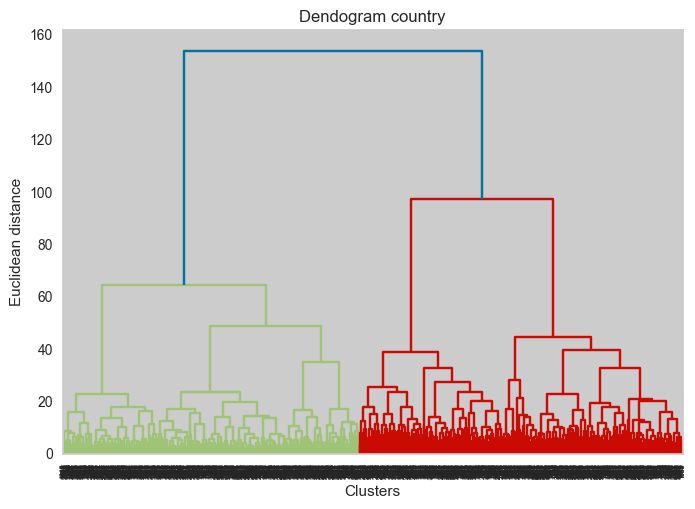

In [468]:
dendogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendogram country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [469]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(df_scaled)
print(silhouette_score(df_scaled, y_hc))
df_personality['hc'] = y_hc

0.20993616569730858


Voy a graficar las 4 opciones que tenemos, que son k_means, k_means con pca, hc, hc con pca

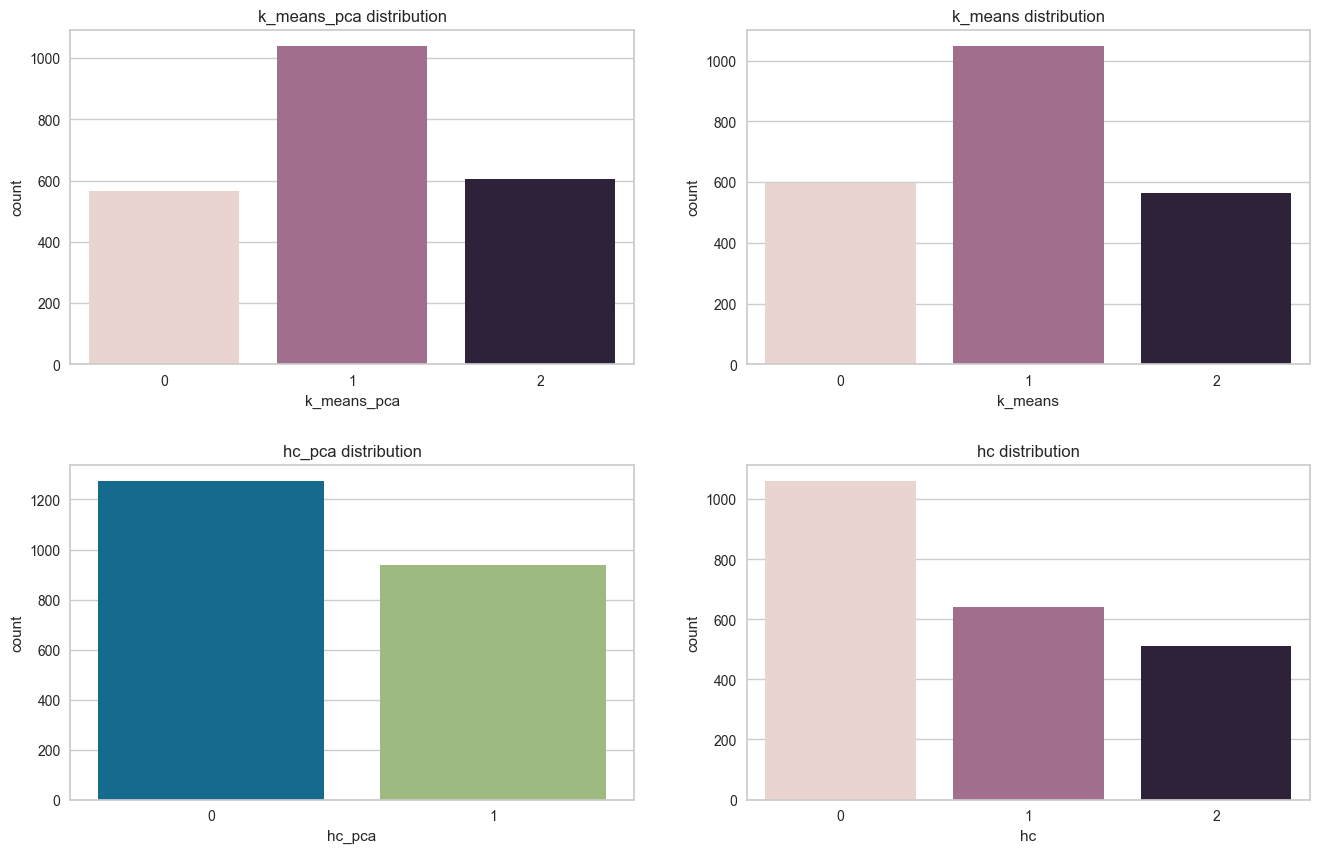

In [470]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

models = ['k_means_pca','k_means','hc_pca','hc']
for i, model in enumerate(models):
    sns.countplot(x=df_personality[model], ax=ax.flatten()[i],hue=df_personality[model], legend=False)
    ax.flatten()[i].set_title(f"{model} distribution")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Evaluando los datos
</center>

En este caso me voy a ir por `k_means_pca` aparte por tener la mejor agrupación que pude hacer

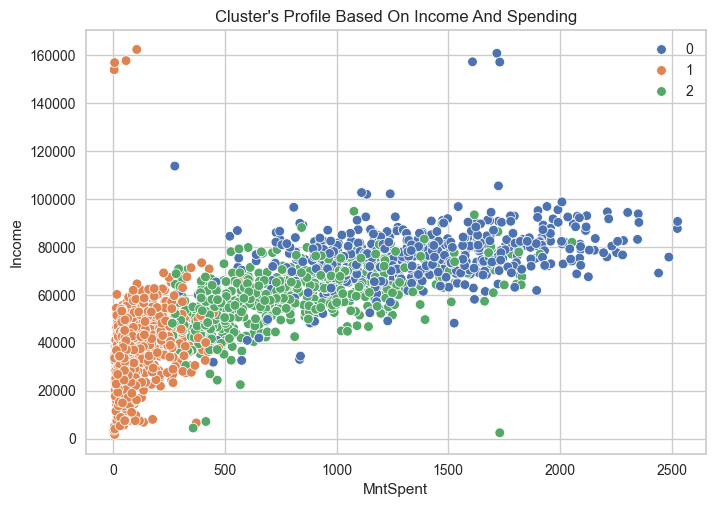

In [471]:
sns.scatterplot(data = df_personality,x=df_personality["MntSpent"], y=df_personality["Income"],hue=df_personality["k_means_pca"], palette='deep')
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Voy a dividir los datos de la siguiente manera:
- **Cluster 0:** Los que ganan más y gastan más
- **Cluster 1:** Los que ganan poco y gastan poco
- **Cluster 2:** Los que ganan poco y gastan más

<Figure size 800x550 with 0 Axes>

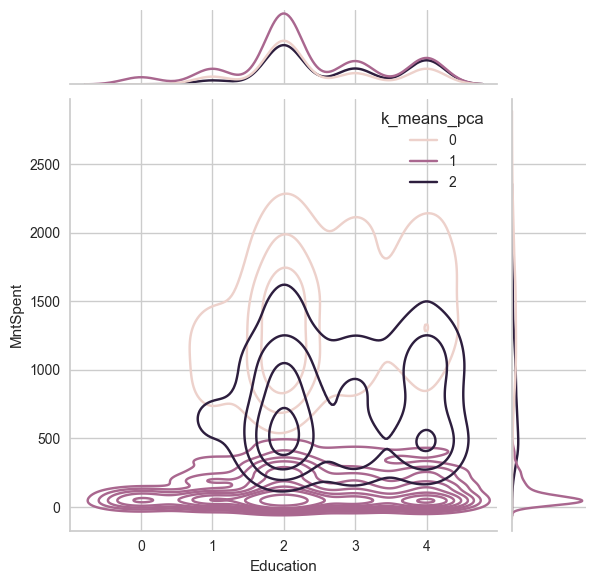

<Figure size 800x550 with 0 Axes>

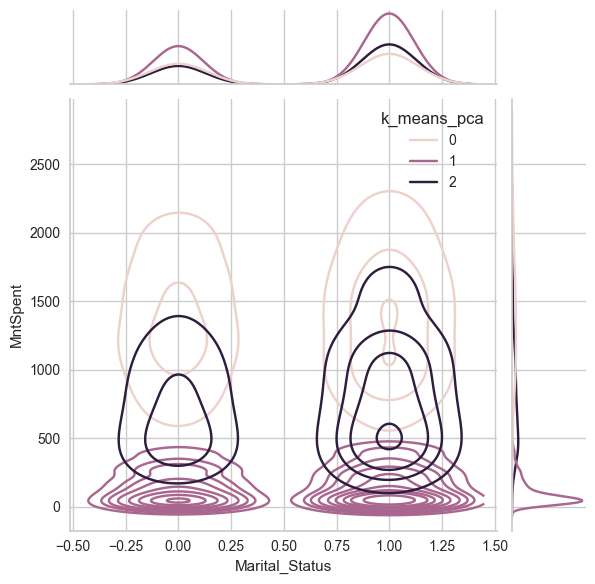

<Figure size 800x550 with 0 Axes>

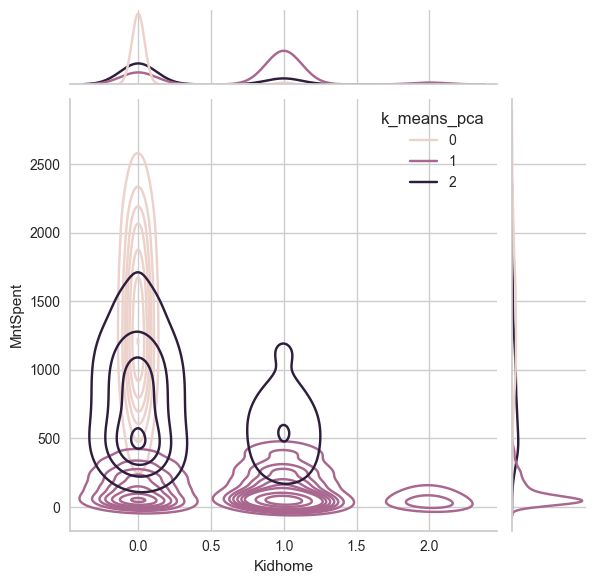

<Figure size 800x550 with 0 Axes>

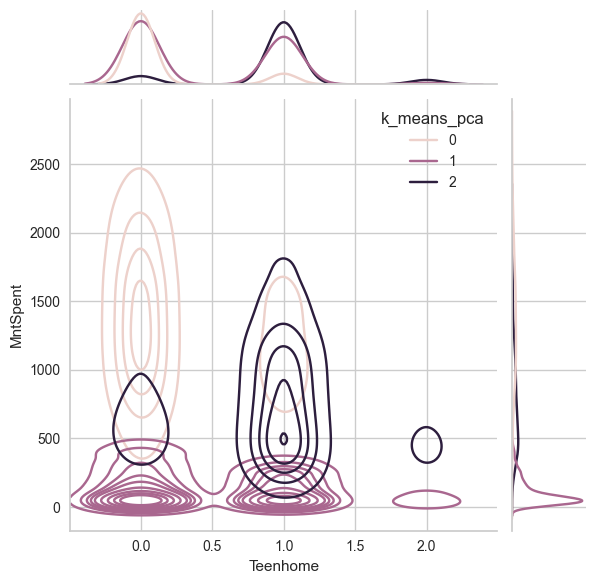

<Figure size 800x550 with 0 Axes>

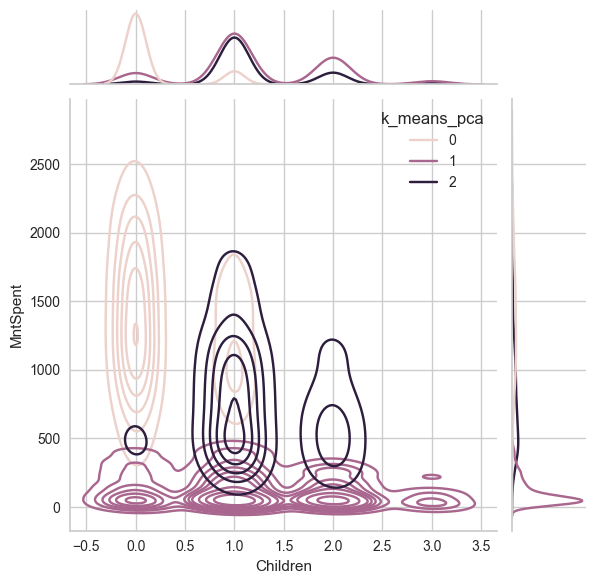

<Figure size 800x550 with 0 Axes>

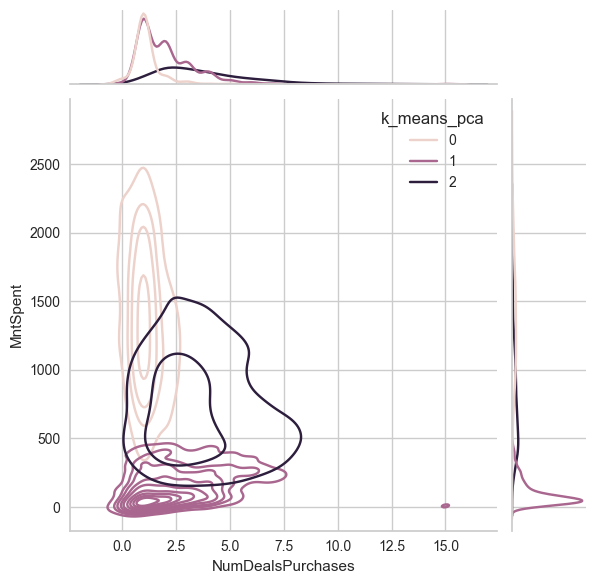

<Figure size 800x550 with 0 Axes>

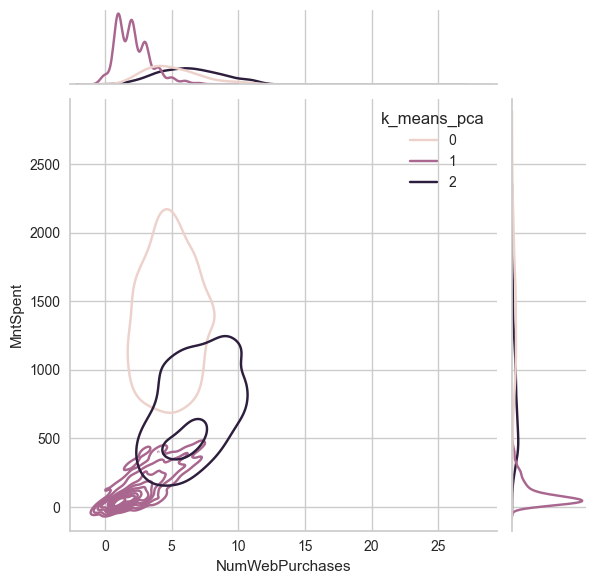

<Figure size 800x550 with 0 Axes>

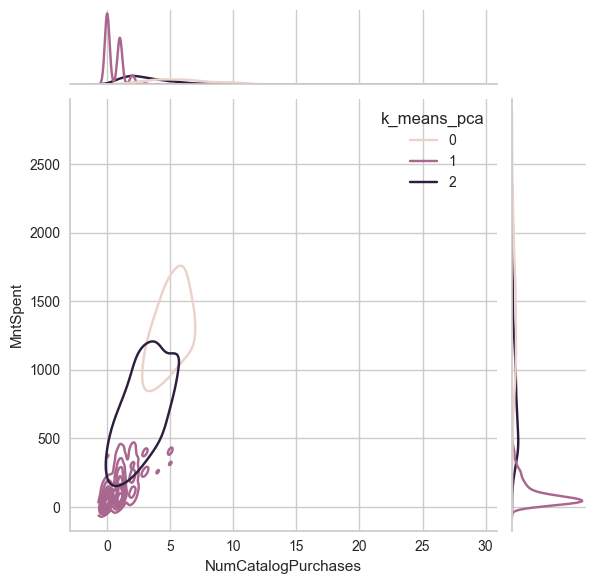

<Figure size 800x550 with 0 Axes>

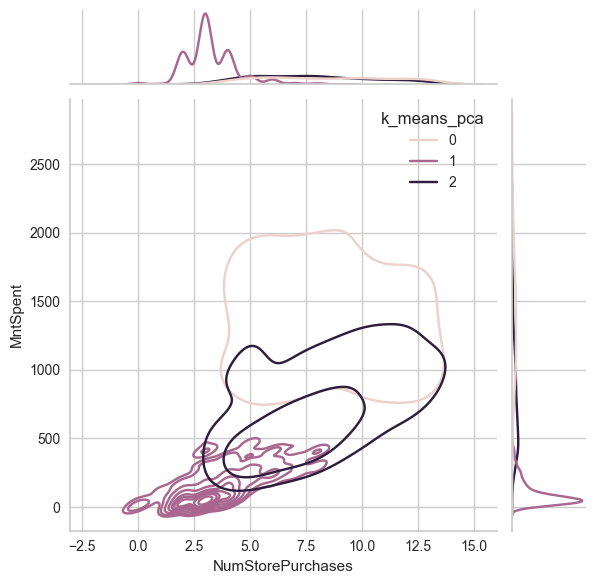

<Figure size 800x550 with 0 Axes>

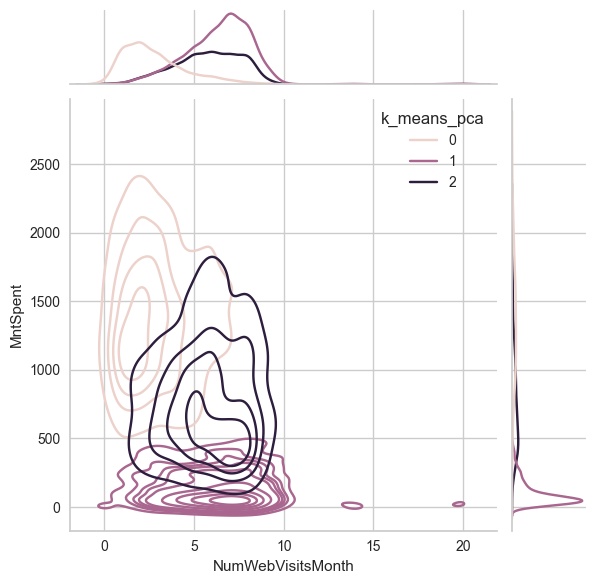

<Figure size 800x550 with 0 Axes>

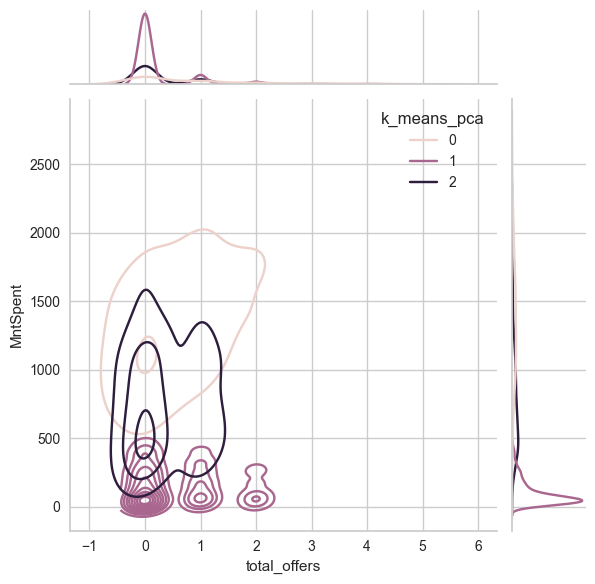

<Figure size 800x550 with 0 Axes>

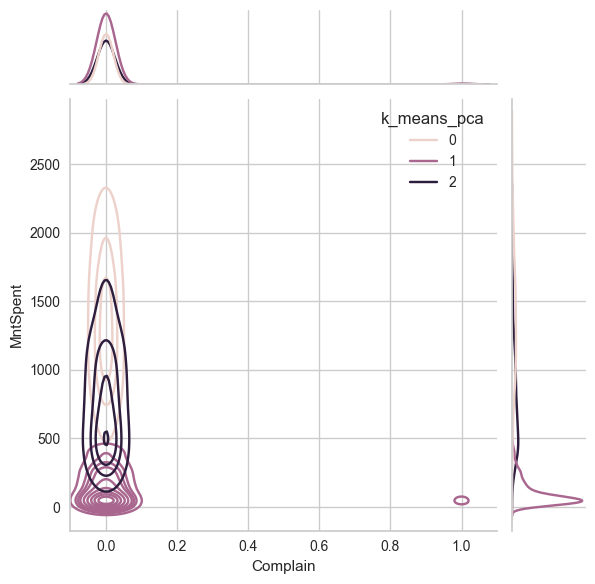

<Figure size 800x550 with 0 Axes>

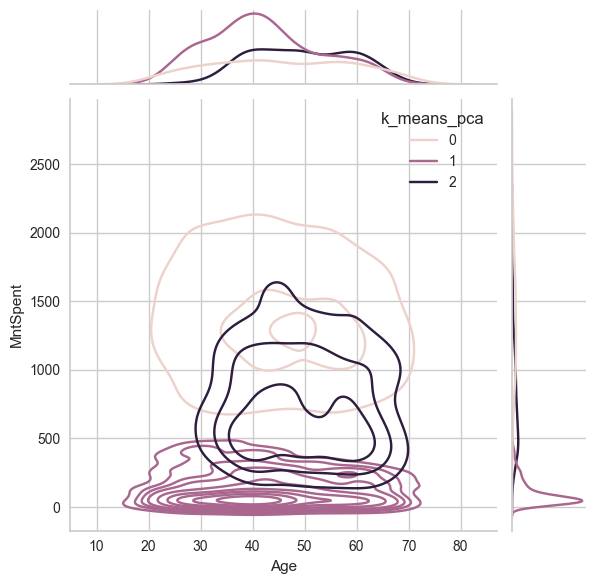

<Figure size 800x550 with 0 Axes>

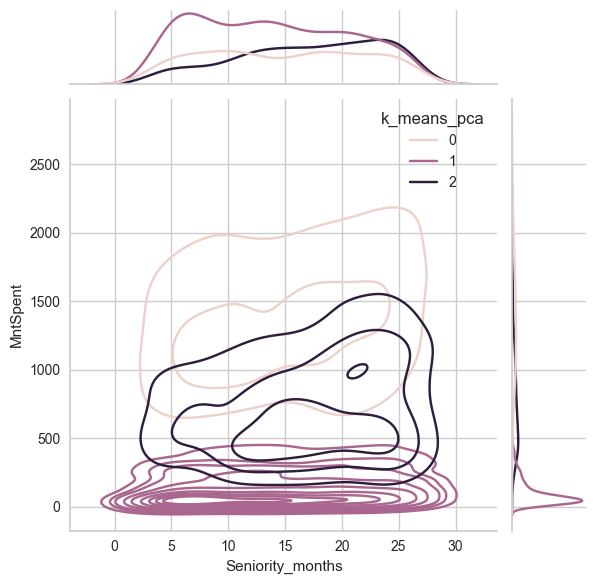

<Figure size 800x550 with 0 Axes>

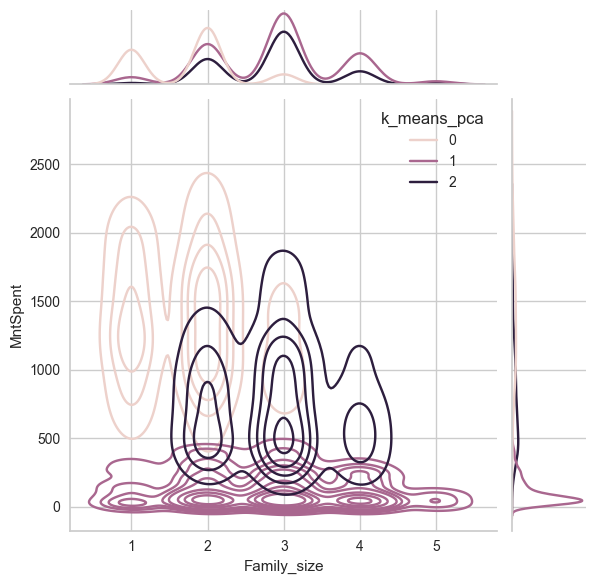

<Figure size 800x550 with 0 Axes>

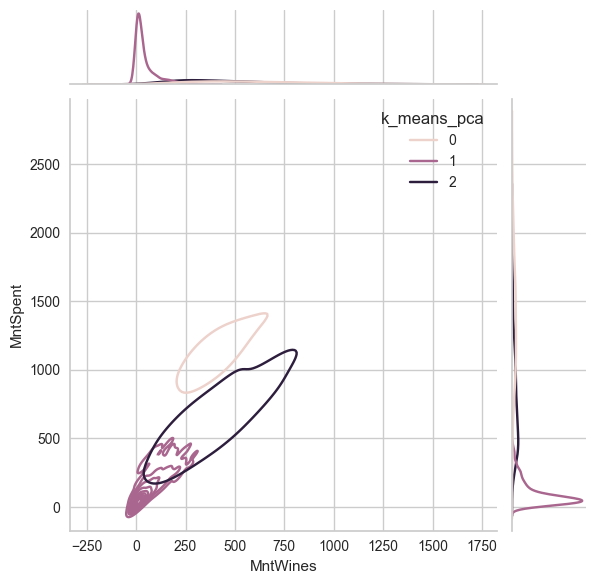

<Figure size 800x550 with 0 Axes>

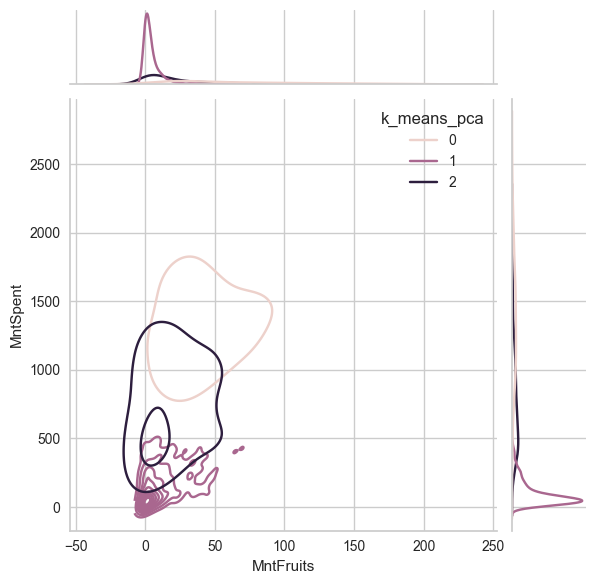

<Figure size 800x550 with 0 Axes>

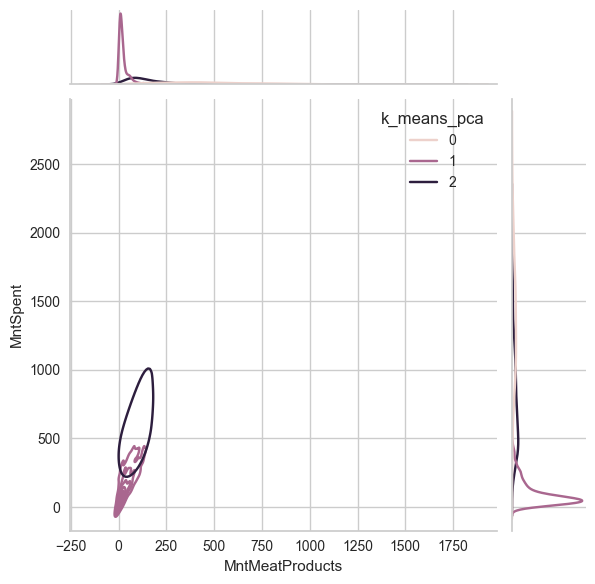

<Figure size 800x550 with 0 Axes>

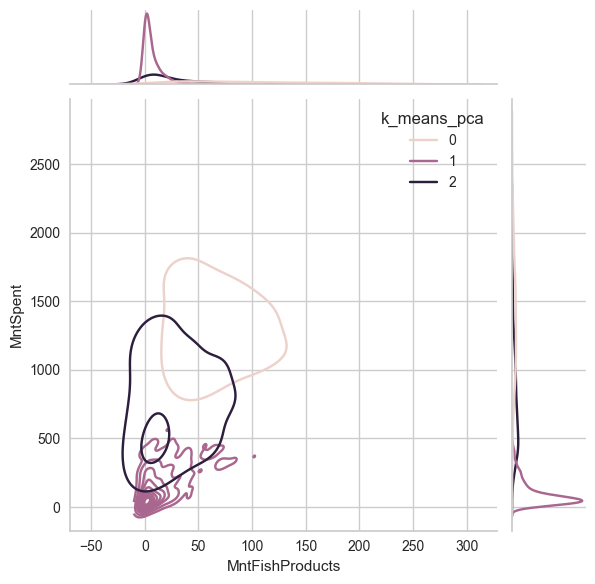

<Figure size 800x550 with 0 Axes>

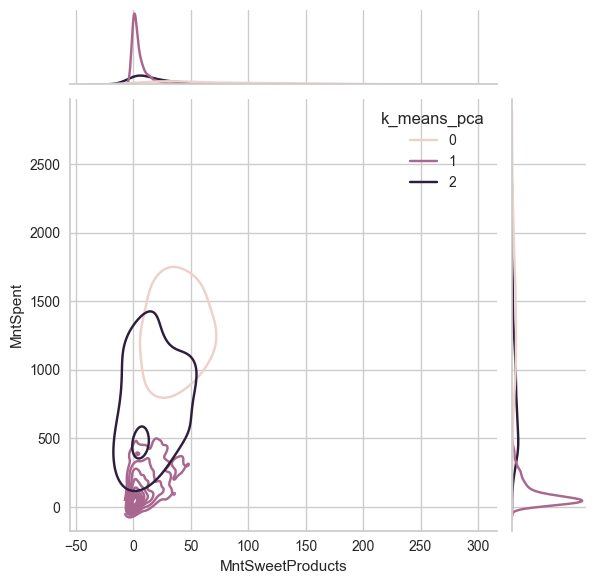

<Figure size 800x550 with 0 Axes>

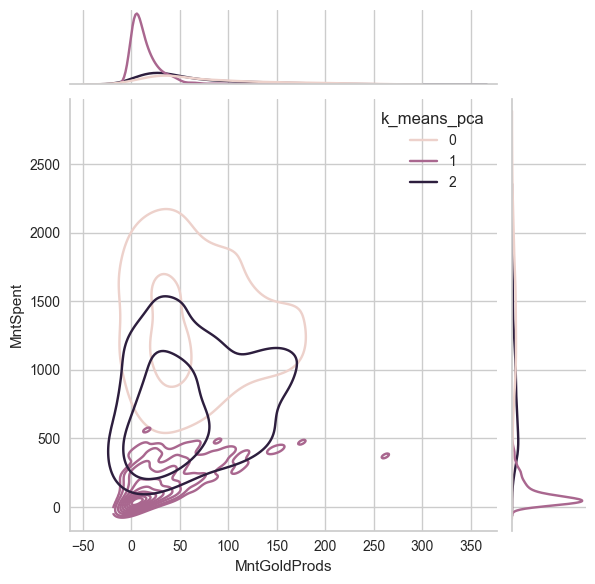

In [477]:
df_personality['total_offers'] = df_personality['AcceptedCmp1']+df_personality['AcceptedCmp2']+df_personality['AcceptedCmp3']+df_personality['AcceptedCmp4']+df_personality['AcceptedCmp5']+df_personality['Response']

i_columns = ["Education","Marital_Status",'Kidhome','Teenhome','Children','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','total_offers','Complain', 'Age','Seniority_months','Family_size','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for i in i_columns:
    plt.figure()
    sns.jointplot(x=df_personality[i], y=df_personality["MntSpent"], hue =df_personality["k_means_pca"],kind='kde')
    plt.show()

<center>
    <h3 style="background: #00ADB580; font-weight: 600; color: #EEEEEE; padding: 5px 0">
        Conclusiones
</center>

- **Cluster 1**, Los que ganan poco y gastan poco
- **Cluster 0**, Los que ganan más y gastan más
- **Cluster 2**, Los que ganan poco y gastan más
<br><br>

- Las personas en **graduation** especialmente gastan más dinero, la educación básica no suele gastar tanto como la superior.

- Las personas que están en **pareja** gastan mas dinero
 
- Las personas que ganan más, no suelen tener **hijos**, quienes ganan menos suelen tener más hijos.

- Las personas que ganan poco suelen tener más niños que adolescentes, quienes ganan poco, pero gastan más, suelen tener mas adolescentes que niños, quienes más ganan no suelen tener hijos.

- Las personas que más ganan no suelen comprar productos en oferta, a diferencia de quienes gastan menos, ellos gastan más en ofertas

- Las personas que ganan poco no suelen hacer compras por catalogo

- Las campañas no suelen funcionar para ningún grupo

- Entre los 30 y 40 se gastan más dinero las personas

- Las personas suelen gastar más cuando llevan más tiempo en la empresa, excepto en el grupo de personas que ganan poco y gastan poco, estas suelen gastar más en sus primeros meses.

- Las personas que ganan más suelen a tener una familia de 2, el resto suelen tener familias mas grandes, en especial quienes ganan poco y gastan poco.

- Quienes ganan más no suelen comprar carne, de resto se comporta casi igual, por ejemplo quienes gastan más, suelen gastar más en vino y así.